In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
coords = []
colours = []
with open('flickrCoordinates2.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for r in reader:
        colour = [int(r[2][i:i+2], 16) for i in (0, 2, 4)]
        colours.append(colour)
        
        coords.append([eval(r[0]), eval(r[1])])

In [18]:
coords = np.array(coords)

In [11]:
colours = np.array(colours)

In [3]:
lat1 = central_latitude = 45.435
lon1 = central_longitude = 12.33

In [4]:
def haversine_distance(lat1,lon1,lat2,lon2):
    R = 6371000 # radius of the earth in metres
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2-lat1)
    delta_lambda = math.radians(lon2-lon1)
    
    # a = sin²(Δφ/2) + cos φ 1 ⋅ cos φ 2 ⋅ sin²(Δλ/2)
    a = math.sin(delta_phi/2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda/2)**2
    # c = 2 ⋅ atan2( √ a , √ (1−a) )
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    distance = R * c
  
    return distance

In [5]:
distances = []
for i in coords:
    lat, lon = i
    distance = haversine_distance(lat1,lon1,lat,lon)
    distances.append(distance)

print(distances)

[1207.8230637611923, 727.2773069798402, 1374.514770242103, 639.2441567261413, 639.2441567261413, 1374.514770242103, 639.2441567261413, 686.7544593283749, 757.805664745907, 781.5210838072204, 838.2289605808841, 299.7605020650786, 357.20922450119275, 604.083067358189, 127.02838967280336, 614.0267740839824, 451.95089822885933, 391.43108395706713, 391.43108395706713, 391.43108395706713, 391.43108395706713, 451.95089822885933, 639.2441567261413, 460.36684301769725, 965.1311849228558, 460.36684301769725, 1070.2035817746205, 724.4057955336846, 1679.9932424539486, 724.4057955336846, 755.9070978665062, 755.9070978665062, 559.8181195006442, 724.4057955336846, 368.4639409162976, 861.6698465305369, 861.6698465305369, 848.4778197487384, 848.4778197487384, 848.4778197487384, 1183.2807604788986, 1183.2807604788986, 1183.2807604788986, 1183.2807604788986, 1114.2798282806984, 708.6923632761765, 708.6923632761765, 568.6977172839375, 708.6923632761765, 708.6923632761765, 734.5725224103813, 734.5725224103

In [48]:
# Create new X-Y coordinates
X = []
Y = []
for i, coord in enumerate(coords):
    lat, lon = coord
    angle = math.degrees(math.atan2(lon - lon1, lat - lat1))
    X.append(distances[i] * math.cos(math.radians(angle)))
    Y.append(distances[i] * math.sin(math.radians(angle)))

In [56]:
len(X)

50000

In [83]:
ncoords = [] 
for i in range(50000):
        ncoords.append([(X[i]), (Y[i])])
        
ncoords = np.array(ncoords)

In [84]:
lim_coord = [-3000, -3000, 3000, 3000]

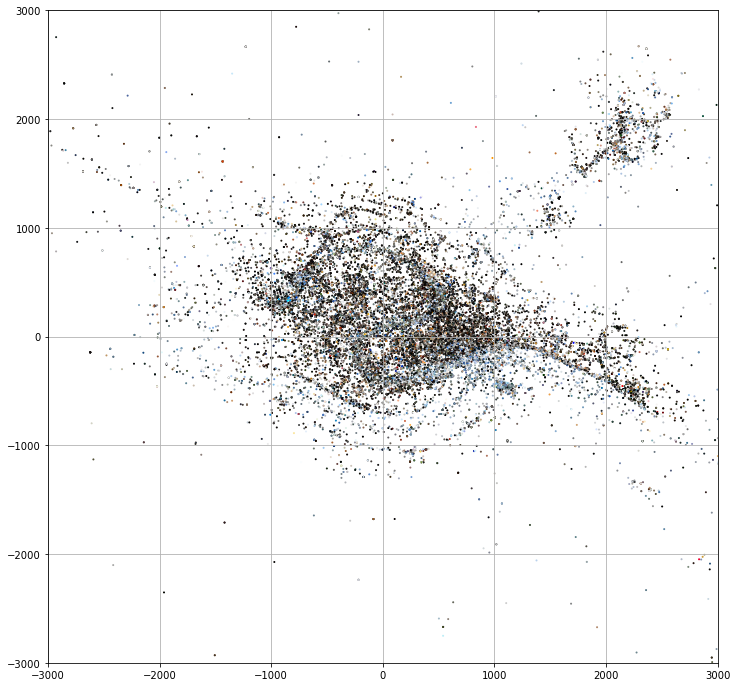

In [86]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(ncoords[:,1], ncoords[:,0], c = colours/255.0, s = 1)
ax.grid(True)
plt.ylim([lim_coord[0], lim_coord[2]])
plt.xlim([lim_coord[1], lim_coord[3]])
plt.show()

In [87]:
lim_coord = [-1000, -1000, 1000, 1000]

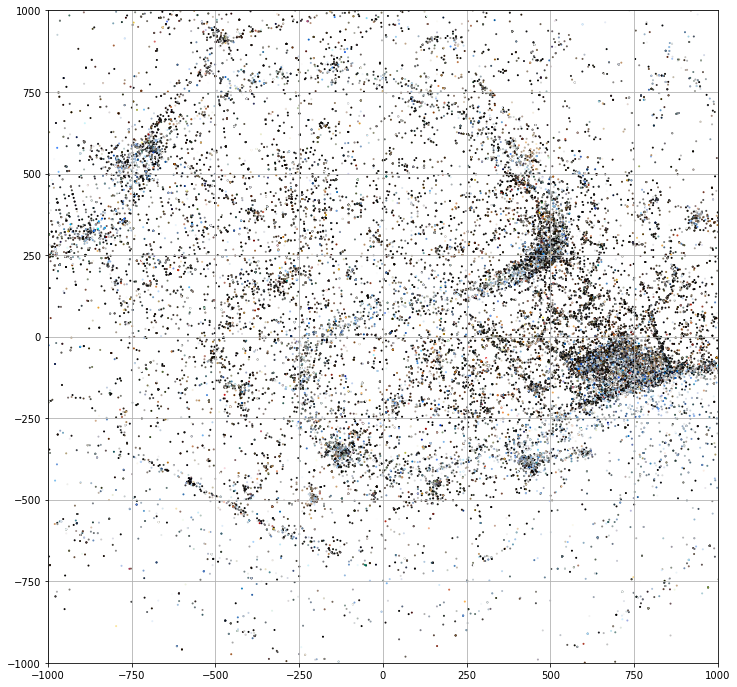

In [89]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(ncoords[:,1], ncoords[:,0], c = colours/255.0, s = 1)
ax.grid(True)
plt.ylim([lim_coord[0], lim_coord[2]])
plt.xlim([lim_coord[1], lim_coord[3]])
plt.show()

In [90]:
lim_coord = [-500, -500, 500, 500]

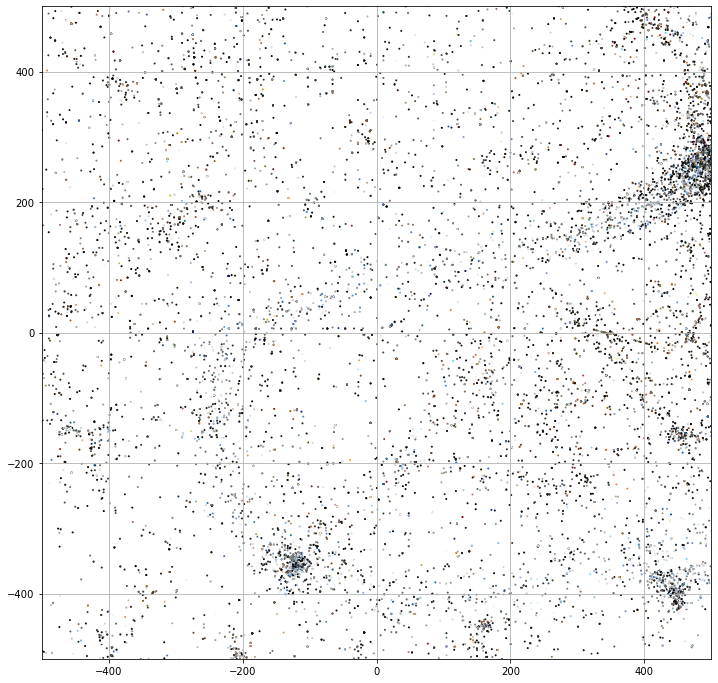

In [92]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(ncoords[:,1], ncoords[:,0], c = colours/255.0, s = 1)
ax.grid(True)
plt.ylim([lim_coord[0], lim_coord[2]])
plt.xlim([lim_coord[1], lim_coord[3]])
plt.show()

In [112]:
lim_coord = [-200, -200, 200, 200]

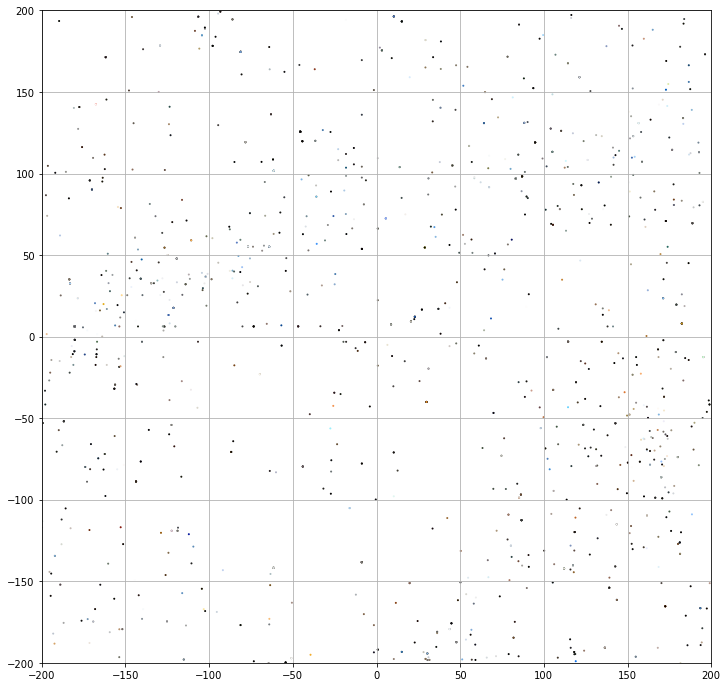

In [113]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(ncoords[:,1], ncoords[:,0], c = colours/255.0, s = 1)
ax.grid(True)
plt.ylim([lim_coord[0], lim_coord[2]])
plt.xlim([lim_coord[1], lim_coord[3]])
plt.show()

In [115]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [116]:
def testIfUniform(latrange, lonrange, coordinates):
    pointsInRange = []
    for c in coordinates:
        if (latrange[0] <= c[0] and c[0]<latrange[1] and 
            lonrange[0] <= c[1] and c[1]<lonrange[1]):
            pointsInRange.append(c)
    
    pointsInRange = np.asarray(pointsInRange)
    scaler = MinMaxScaler()
    normalised = scaler.fit_transform(pointsInRange)
    print(stats.kstest(normalised[:,0], 'uniform'))
    print(stats.kstest(normalised[:,1], 'uniform'))

In [117]:
ncoords[1]

array([-43.46327657, 725.97742722])

In [118]:
testIfUniform([-200, 200], [-200,200], ncoords)

KstestResult(statistic=0.06627233479626748, pvalue=5.0547598626492446e-06)
KstestResult(statistic=0.09624647118165885, pvalue=3.1278831739296396e-12)


In [119]:
def testIfUniform(latrange, lonrange, coordinates, statThresh, pThresh):
    pointsInRange = []
    for c in coordinates:
        if (latrange[0] <= c[0] and c[0]<latrange[1] and 
            lonrange[0] <= c[1] and c[1]<lonrange[1]):
            pointsInRange.append(c)
    
    if len(pointsInRange) > 2 and min(latrange[1]-latrange[0], lonrange[1]-lonrange[0]) > 0.00005:
        points = np.asarray(pointsInRange)
        scaler = MinMaxScaler()
        normalised = scaler.fit_transform(pointsInRange)
        
        xKS = stats.kstest(normalised[:,0], 'uniform')
        yKS = stats.kstest(normalised[:,1], 'uniform')
        
        if xKS[0] < statThresh and yKS[0] < statThresh and xKS[1] > pThresh and yKS[1] > pThresh:
            return True, pointsInRange
        else:
            return False, pointsInRange
        
    else:
        return True, pointsInRange

In [120]:
def evaluate(latrange, lonrange, coordinates, statThresh = 0.7, pThresh = 0.05):
    uniform, inrange = testIfUniform(latrange, lonrange, coordinates, statThresh, pThresh)
    latdiff = latrange[1]-latrange[0]
    londiff = lonrange[1]-lonrange[0]
    
    if uniform:
        return [(latrange[0], lonrange[0]), (latdiff, londiff), inrange]
    else:
        a = evaluate([latrange[0],latrange[0]+latdiff/2], [lonrange[0],lonrange[0]+londiff/2], inrange, statThresh, pThresh)
        b = evaluate([latrange[0]+latdiff/2,latrange[1]], [lonrange[0],lonrange[0]+londiff/2], inrange, statThresh, pThresh)
        c = evaluate([latrange[0],latrange[0]+latdiff/2], [lonrange[0]+londiff/2,lonrange[1]], inrange, statThresh, pThresh)
        d = evaluate([latrange[0]+latdiff/2,latrange[1]], [lonrange[0]+londiff/2,lonrange[1]], inrange, statThresh, pThresh)
        
        return[a,b,c,d]

In [121]:
def unpack(tree, squares):
    if len(tree) == 4:
        for t in tree:
            unpack(t, squares)
    else:
        squares.append(tree)

In [122]:
squares = evaluate([-200, 200], [-200, 200], ncoords, statThresh = 0.8, pThresh = 0.01)

In [123]:
len(squares)

4

In [124]:
squares

[[[(-200, -200),
   (100.0, 100.0),
   [array([-128.74333188, -109.40716862]),
    array([-116.88863963, -152.82616648]),
    array([-146.1736053 , -125.99475743]),
    array([-146.1736053 , -125.99475743]),
    array([-139.19923293, -160.2900258 ]),
    array([-127.22074262, -151.36006302]),
    array([-157.27785306, -116.06924198]),
    array([-196.53476152, -153.67079981]),
    array([-160.7193016, -156.6675545]),
    array([-179.36567468, -151.82410988]),
    array([-179.36567468, -151.82410988]),
    array([-188.24260317, -192.35771854]),
    array([-113.17151466, -199.72983581]),
    array([-152.07271959, -188.88837798]),
    array([-152.07271959, -188.88837798]),
    array([-152.07271959, -188.88837798]),
    array([-127.29623056, -188.16142402]),
    array([-187.84181417, -171.45685842]),
    array([-117.13418948, -118.57200686]),
    array([-119.022201  , -122.36820665]),
    array([-119.022201  , -122.36820665]),
    array([-168.26142693, -102.36161699]),
    array([-197.9817

In [125]:
blocks = []
unpack(squares, blocks)

In [126]:
len(blocks)

2860

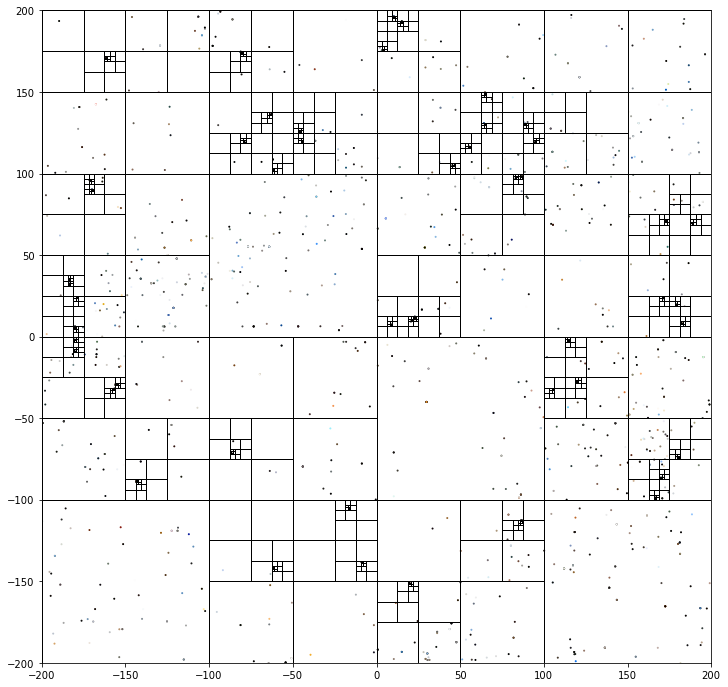

In [127]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(ncoords[:,1], ncoords[:,0], c = colours/255.0, s = 1)
for b in blocks:
    ax.add_patch(Rectangle((b[0][1],b[0][0]), b[1][1], b[1][0],
                           edgecolor = 'black',
                           fill=False,lw=1))
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.show()

In [128]:
blocks.sort(key = lambda x:x[1][0]*x[1][1], reverse = True)

In [129]:
def sharesBorder(s1, s2):
    s1lim = [s1[0][0], s1[0][1], s1[0][0]+s1[1][0], s1[0][1]+s1[1][1]]
    s2lim = [s2[0][0], s2[0][1], s2[0][0]+s2[1][0], s2[0][1]+s2[1][1]]
    
    lBorders = [[(s1lim[0], s1lim[1]), (s1lim[2], s1lim[1])],
                [(s1lim[0], s1lim[3]), (s1lim[2], s1lim[3])],
                [(s1lim[0], s1lim[1]), (s1lim[0], s1lim[3])],
                [(s1lim[2], s1lim[1]), (s1lim[2], s1lim[3])]
                ]
    rBorders = [[(s2lim[0], s2lim[1]), (s2lim[2], s2lim[1])],
                [(s2lim[0], s2lim[3]), (s2lim[2], s2lim[3])],
                [(s2lim[0], s2lim[1]), (s2lim[0], s2lim[3])],
                [(s2lim[2], s2lim[1]), (s2lim[2], s2lim[3])]
                ]

    for lb in lBorders:
        for rb in rBorders:
            if checkOverlap(lb, rb):
                return True

def checkOverlap(a, b):
    if a[0][0] == b[0][0] == a[1][0] == b[1][0]:
        return a[1][1] > b[0][1] and b[1][1] > a[0][1]
    elif a[0][1] == b[0][1] == a[1][1] == b[1][1]:
        return a[1][0] > b[0][0] and b[1][0] > a[0][0]

In [130]:
def matchDensity(b1, b2, ta = 0.18511, tc = 0.00004):
    area1 = b1[1][0]*b1[1][1]
    area2 = b2[1][0]*b2[1][1]
    if len(b1[2]) and len(b2[2]):
        d1 = (area1/len(b1[2]))*100000
        d2 = (area2/len(b2[2]))*100000

        t = ta * min(d1, d2) + tc

        if abs(d1 - d2) < t:
                return True
        else:
            return False
    elif len(b1[2]) == len(b2[2]) == 0:
            return True
    else:
        return False

In [131]:
def addToGroup(group, blocks):
    added = True
    while added:
        found = False
        for g in group:
            for b in blocks:
                if sharesBorder(g,b) and matchDensity(g,b):
                    found = True
                    group.append(b)
                    blocks.remove(b)
        added = found

In [132]:
blocks = []
unpack(squares, blocks)

In [133]:
groups = []
while len(blocks) > 0:
    group = [blocks[0]]
    blocks.remove(blocks[0])
    addToGroup(group,blocks)
    groups.append(group)    

In [134]:
print(len(groups))

182


In [135]:
print(groups[0])

[[(-200, -200), (100.0, 100.0), [array([-128.74333188, -109.40716862]), array([-116.88863963, -152.82616648]), array([-146.1736053 , -125.99475743]), array([-146.1736053 , -125.99475743]), array([-139.19923293, -160.2900258 ]), array([-127.22074262, -151.36006302]), array([-157.27785306, -116.06924198]), array([-196.53476152, -153.67079981]), array([-160.7193016, -156.6675545]), array([-179.36567468, -151.82410988]), array([-179.36567468, -151.82410988]), array([-188.24260317, -192.35771854]), array([-113.17151466, -199.72983581]), array([-152.07271959, -188.88837798]), array([-152.07271959, -188.88837798]), array([-152.07271959, -188.88837798]), array([-127.29623056, -188.16142402]), array([-187.84181417, -171.45685842]), array([-117.13418948, -118.57200686]), array([-119.022201  , -122.36820665]), array([-119.022201  , -122.36820665]), array([-168.26142693, -102.36161699]), array([-197.98179692, -115.13466847]), array([-197.98179692, -115.13466847]), array([-167.10869862, -139.405657

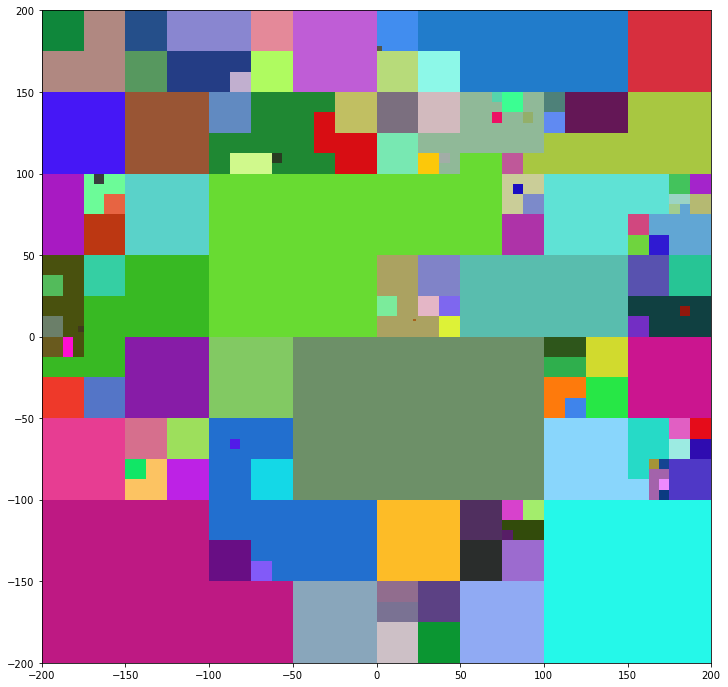

In [136]:
from matplotlib.patches import Rectangle
import random

fig, ax = plt.subplots(figsize = (12,12))
#ax.scatter(coords[:,1], coords[:,0], c = colours/255.0, s = 1)
for g in groups:
    colour = np.array(random.sample(range(10, 255), 3))/255
    for b in g:
        ax.add_patch(Rectangle((b[0][1],b[0][0]), b[1][1], b[1][0],
                               facecolor = colour,
                               fill=True))
plt.ylim([-200, 200])
plt.xlim([-200,200])
plt.show()

In [137]:
groups.sort(key = lambda x : len(x), reverse = True)

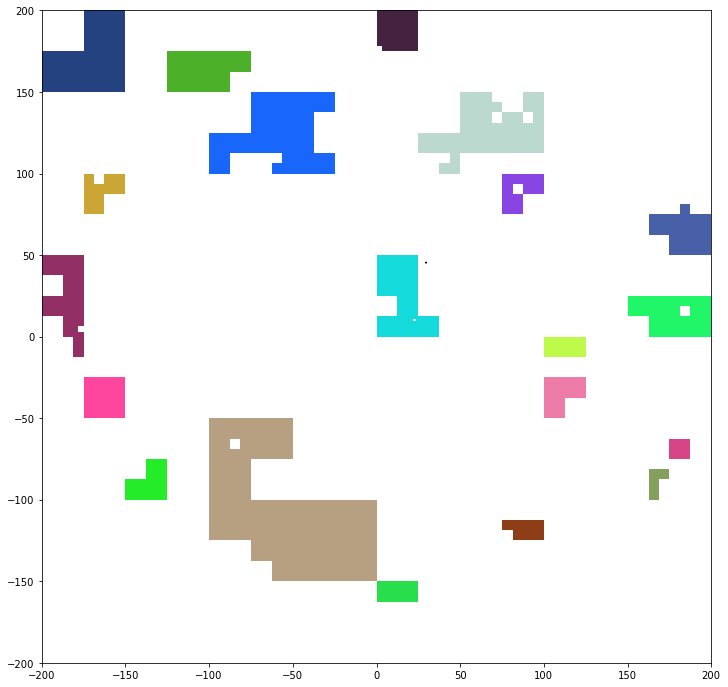

In [138]:
from matplotlib.patches import Rectangle
import random

fig, ax = plt.subplots(figsize = (12,12))

ax.scatter(coords[:,1], coords[:,0], c = colours/255.0, s = 1)

for g in groups[0:20]:
    colour = np.array(random.sample(range(10, 255), 3))/255
    for b in g:
        ax.add_patch(Rectangle((b[0][1],b[0][0]), b[1][1], b[1][0],
                               facecolor = colour,
                               fill=True))



plt.ylim([-200,200])
plt.xlim([-200,200])
plt.show()